In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,130.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0


In [4]:
meteo=df.loc[:,['Temperature','Dew Point','Relative Humidity','Wind Speed','Precipitation','Precipitation Cover','Visibility','WeatherDelay']]
meteo=meteo[meteo['WeatherDelay'] > 0]

In [5]:
print(df.shape)
print(meteo.shape)
meteo.head()

(1110138, 32)
(78285, 8)


,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,WeatherDelay
28,65.0,55.6,71.63,16.1,0.0,0.0,10.0,233.0
50,31.4,29.5,92.85,12.8,0.0,0.0,2.2,22.0
127,23.1,10.1,56.99,8.4,0.0,0.0,10.0,30.0
150,25.1,16.6,69.76,8.2,0.0,0.0,10.0,3.0
154,18.4,12.4,77.12,3.3,0.0,0.0,9.6,25.0


In [6]:
X=meteo.iloc[:,:-1].values
y=meteo.iloc[:,7].values
X

array([[ 65.  ,  55.6 ,  71.63, ...,   0.  ,   0.  ,  10.  ],
       [ 31.4 ,  29.5 ,  92.85, ...,   0.  ,   0.  ,   2.2 ],
       [ 23.1 ,  10.1 ,  56.99, ...,   0.  ,   0.  ,  10.  ],
       ...,
       [ 71.  ,  64.7 ,  80.66, ...,   0.  ,   0.  ,  10.  ],
       [ 60.8 ,  57.5 ,  89.07, ...,   0.  ,   0.  ,  10.  ],
       [ 68.1 ,  67.4 ,  97.52, ...,   0.  , 100.  ,  10.  ]])

In [7]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

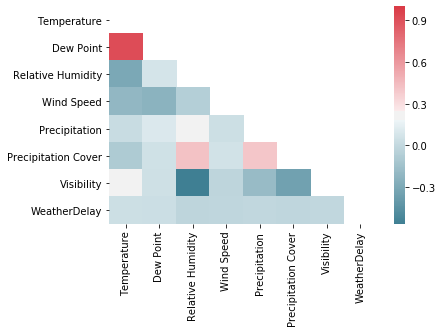

In [8]:
plot_corr(meteo.corr())

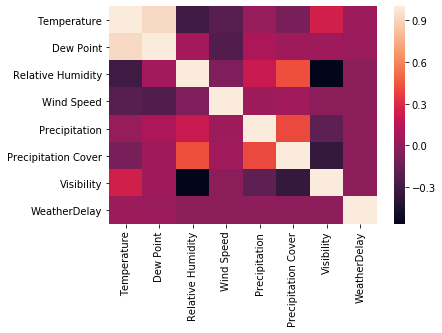

In [9]:
sns.heatmap(meteo.corr())

In [10]:
#X=X[:,[0,2,3,4,5,6]]
#X

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.92112732, -1.02536655, -0.38158536, ..., -0.21016416,
        -0.52455291,  0.39872042],
       [-1.83158389, -1.79427556,  0.27282507, ..., -0.21016416,
        -0.52455291, -0.47122716],
       [-1.09573543, -0.85247576,  0.90718098, ..., -0.21016416,
        -0.52455291, -0.47122716],
       ...,
       [ 0.63371632,  0.71264082, -0.04013088, ..., -0.21016416,
        -0.52455291, -0.27548896],
       [-1.96877597, -2.17190544, -0.56840898, ..., -0.21016416,
        -0.52455291,  0.39872042],
       [-0.96270068, -0.66138595,  1.10825386, ..., -0.21016416,
         1.90638537, -1.38467212]])

In [13]:
regressor=LinearRegression()
regressor.fit(X_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
scaler.transform(X_test)

array([[-1.54472771, -1.8443229 , -0.9061692 , ..., -0.21016416,
        -0.52455291,  0.39872042],
       [-0.95854334, -0.67503522,  1.05389557, ..., -0.21016416,
        -0.52455291, -0.90620095],
       [-0.83382326, -0.50214443,  1.21697043, ..., -0.21016416,
        -0.52455291, -1.14543653],
       ...,
       [-0.72573253, -0.72053279, -0.06282415, ..., -0.21016416,
        -0.52455291,  0.39872042],
       [ 0.75427906,  1.05387263,  0.6253623 , ..., -0.21016416,
        -0.52455291, -0.40598109],
       [ 0.9787752 ,  1.18126585,  0.26015906, ..., -0.21016416,
        -0.52455291,  0.20298221]])

In [15]:
y_pred=regressor.predict(X_test)
print(y_pred)

[-277.73650011 -304.04457314 -302.61461988 ... -267.81621522 -220.40216066
 -204.75059692]


In [16]:
regressor.coef_

array([-6.06490422,  8.0001022 , -4.22320378, -0.12575961, -0.37001731,
       -0.22806622, -1.68997323])

In [17]:
regressor.intercept_

43.412195822955525

In [18]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
r2_score(y_test,y_pred)

303.5968076302951


-29.483858784985518